In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
house_data = pd.read_csv('datasets/HousingData.csv')

In [7]:
house_data.shape

(506, 14)

In [8]:
house_data.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
464,7.83932,0.0,18.10,0.0,0.655,6.209,65.4,2.9634,24,666,20.2,396.90,13.22,21.4
254,0.04819,80.0,3.64,NaN,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4,304,18.4,395.21,10.36,23.1
44,0.12269,0.0,6.91,0.0,0.448,6.069,40.0,5.7209,3,233,17.9,389.39,9.55,21.2
213,0.14052,0.0,10.59,0.0,0.489,6.375,32.3,3.9454,4,277,18.6,385.81,9.38,28.1


In [9]:
house_data = house_data.drop(['B', 'LSTAT'], axis=1)

In [10]:
house_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,22.0


In [11]:
col_names = ['CrimeRate', 'ZoneRatio', 'IndusRatio', 'AlongRiver', 'NO2Level', 'RoomsPerHouse', 'OldHomeRatio',
             'DisFromCenter','RoadAccessIndex', 'PropTaxRate', 'PupilTeacherRatio', 'MedianHomeValue']

In [12]:
house_data.columns = col_names

house_data.sample(5)

,CrimeRate,ZoneRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,MedianHomeValue
274,0.05644,40.0,6.41,1.0,0.4470,6.758,32.9,4.0776,4,254,17.6,32.4
130,0.34006,0.0,21.89,0.0,0.6240,6.458,98.9,2.1185,4,437,21.2,19.2
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4,224,14.7,50.0
452,5.09017,0.0,18.10,0.0,0.7130,6.297,91.8,2.3682,24,666,20.2,16.1
460,NaN,0.0,18.10,0.0,0.7130,6.701,90.0,2.5975,24,666,20.2,16.4


In [13]:
house_data = house_data.replace('NA', np.nan)

In [14]:
house_data.isnull().sum().sort_values(ascending=False)

OldHomeRatio         20
AlongRiver           20
IndusRatio           20
ZoneRatio            20
CrimeRate            20
MedianHomeValue       0
PupilTeacherRatio     0
PropTaxRate           0
RoadAccessIndex       0
DisFromCenter         0
RoomsPerHouse         0
NO2Level              0
dtype: int64

In [15]:
data = house_data.fillna(house_data.mean())

In [16]:
data.isnull().sum()

CrimeRate            0
ZoneRatio            0
IndusRatio           0
AlongRiver           0
NO2Level             0
RoomsPerHouse        0
OldHomeRatio         0
DisFromCenter        0
RoadAccessIndex      0
PropTaxRate          0
PupilTeacherRatio    0
MedianHomeValue      0
dtype: int64

In [17]:
data.shape

(506, 12)

In [18]:
target = data['MedianHomeValue']

features = data.drop('MedianHomeValue', axis = 1)

In [19]:
features.shape, target.shape

((506, 11), (506,))

In [20]:
from yellowbrick.target import FeatureCorrelation

feature_names = list(features.columns)

C:\Users\NEHA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


C:\Users\NEHA\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


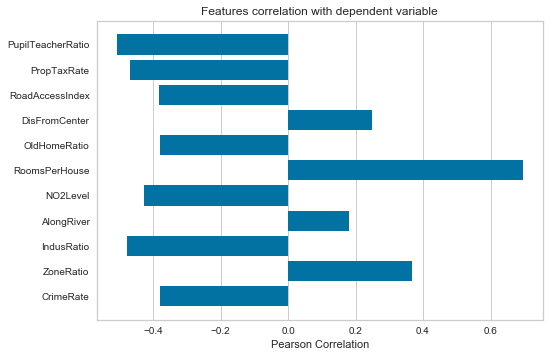

In [21]:
visualizer = FeatureCorrelation(labels = feature_names)

visualizer.fit(features, target)

visualizer.poof()

In [22]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

In [23]:
select_univariate = SelectKBest(f_regression, k=5).fit(features, target)

In [24]:
#True indicates feature was selected
feature_mask = select_univariate.get_support()
feature_mask

array([False, False,  True, False,  True,  True, False, False, False,
        True,  True])

In [25]:
features.columns[feature_mask]

Index(['IndusRatio', 'NO2Level', 'RoomsPerHouse', 'PropTaxRate',
       'PupilTeacherRatio'],
      dtype='object')

In [26]:
select_univariate.scores_

array([ 84.90107412,  77.9285999 , 149.79218706,  16.85363275,
       112.59148028, 471.84673988,  85.17727935,  33.57957033,
        85.91427767, 141.76135658, 175.10554288])

In [27]:
pd.DataFrame({'FeatureName': features.columns,
             'Score':select_univariate.scores_ }).sort_values(by='Score', ascending=False)

,FeatureName,Score
5,RoomsPerHouse,471.846740
10,PupilTeacherRatio,175.105543
2,IndusRatio,149.792187
9,PropTaxRate,141.761357
4,NO2Level,112.591480
8,RoadAccessIndex,85.914278
6,OldHomeRatio,85.177279
0,CrimeRate,84.901074
1,ZoneRatio,77.928600
7,DisFromCenter,33.579570


In [28]:
uni_df = pd.DataFrame({'Univariate Method': features.columns[feature_mask]})
uni_df

,Univariate Method
0,IndusRatio
1,NO2Level
2,RoomsPerHouse
3,PropTaxRate
4,PupilTeacherRatio


Wrapper Methods for feature selection

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

linear_regression = LinearRegression()

In [30]:
rfe = RFE(estimator = linear_regression,
         n_features_to_select = 5,
         step=1)

In [32]:
rfe.fit(features, target)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [33]:
rfe_features = features.columns[rfe.support_]

rfe_features

Index(['AlongRiver', 'NO2Level', 'RoomsPerHouse', 'DisFromCenter',
       'PupilTeacherRatio'],
      dtype='object')

In [35]:
#the features with ranking 1 are selected by rfe
pd.DataFrame({'FeatureName': features.columns,
             'Rank': rfe.ranking_}).sort_values(by='Rank')

,FeatureName,Rank
3,AlongRiver,1
4,NO2Level,1
5,RoomsPerHouse,1
7,DisFromCenter,1
10,PupilTeacherRatio,1
2,IndusRatio,2
0,CrimeRate,3
8,RoadAccessIndex,4
6,OldHomeRatio,5
1,ZoneRatio,6


In [36]:
rfe_df = pd.DataFrame({'RFE Method': rfe_features})

rfe_df

,RFE Method
0,AlongRiver
1,NO2Level
2,RoomsPerHouse
3,DisFromCenter
4,PupilTeacherRatio


In [37]:
!pip install mlxtend --upgrade

In [38]:
!pip install joblib --upgrade

  Attempting uninstall: joblib
    Found existing installation: joblib 0.15.1
    Uninstalling joblib-0.15.1:
      Successfully uninstalled joblib-0.15.1


In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [40]:
feature_selector = SequentialFeatureSelector(LinearRegression(),
                                            k_features = 5,
                                            forward = False,
                                            scoring = 'neg_mean_squared_error',
                                            cv=4)

In [41]:
feature_filtered = feature_selector.fit(features, target)

In [42]:
backward_features = list(feature_filtered.k_feature_names_)
backward_features

['ZoneRatio',
 'NO2Level',
 'RoomsPerHouse',
 'DisFromCenter',
 'PupilTeacherRatio']

In [43]:
back_df = pd.DataFrame({'Backward Method': backward_features})

back_df

,Backward Method
0,ZoneRatio
1,NO2Level
2,RoomsPerHouse
3,DisFromCenter
4,PupilTeacherRatio


In [44]:
feature_selector = SequentialFeatureSelector(LinearRegression(),
                                            k_features = 5,
                                            forward = True,
                                            scoring = 'neg_mean_squared_error',
                                            cv=4)

In [45]:
feature_filtered = feature_selector.fit(features, target)

In [46]:
forward_features = list(feature_filtered.k_feature_names_)
forward_features

['ZoneRatio',
 'IndusRatio',
 'RoomsPerHouse',
 'OldHomeRatio',
 'PupilTeacherRatio']

In [47]:
forw_df = pd.DataFrame({'Forward Method': forward_features})

forw_df

,Forward Method
0,ZoneRatio
1,IndusRatio
2,RoomsPerHouse
3,OldHomeRatio
4,PupilTeacherRatio


In [48]:
from sklearn.linear_model import Lasso

In [50]:
# the alpha property determines the strength of the regularization and value of 1 indicated the strongest regularization
lasso = Lasso(alpha=1.0)
lasso.fit(features, target)

Lasso()

In [52]:
lasso_coef = pd.DataFrame({'Feature': features.columns,
                          'LassoCoef': lasso.coef_}).sort_values(by='LassoCoef', ascending= False)

lasso_coef

,Feature,LassoCoef
5,RoomsPerHouse,4.385491
8,RoadAccessIndex,0.195388
1,ZoneRatio,0.042629
3,AlongRiver,0.000000
4,NO2Level,-0.000000
9,PropTaxRate,-0.016605
6,OldHomeRatio,-0.046299
2,IndusRatio,-0.087830
0,CrimeRate,-0.160247
7,DisFromCenter,-0.636740


In [53]:
lasso_coef['LassoCoef'] = abs(lasso_coef['LassoCoef'])

lasso_coef.sort_values(by='LassoCoef', ascending=False)

,Feature,LassoCoef
5,RoomsPerHouse,4.385491
10,PupilTeacherRatio,0.737281
7,DisFromCenter,0.636740
8,RoadAccessIndex,0.195388
0,CrimeRate,0.160247
2,IndusRatio,0.087830
6,OldHomeRatio,0.046299
1,ZoneRatio,0.042629
9,PropTaxRate,0.016605
3,AlongRiver,0.000000


In [55]:
# here are the most relevent features selected using lasso embeded technique
lasso_df = lasso_coef.sort_values(by='LassoCoef', ascending=False).head(5)

lasso_df = pd.DataFrame({'Lasso Method': lasso_df['Feature'].values})

lasso_df

,Lasso Method
0,RoomsPerHouse
1,PupilTeacherRatio
2,DisFromCenter
3,RoadAccessIndex
4,CrimeRate


In [56]:
comp_selected_col_df = [uni_df, rfe_df, back_df, forw_df, lasso_df]

final_df = pd.concat(comp_selected_col_df, axis=1)

In [57]:
final_df

,Univariate Method,RFE Method,Backward Method,Forward Method,Lasso Method
0,IndusRatio,AlongRiver,ZoneRatio,ZoneRatio,RoomsPerHouse
1,NO2Level,NO2Level,NO2Level,IndusRatio,PupilTeacherRatio
2,RoomsPerHouse,RoomsPerHouse,RoomsPerHouse,RoomsPerHouse,DisFromCenter
3,PropTaxRate,DisFromCenter,DisFromCenter,OldHomeRatio,RoadAccessIndex
4,PupilTeacherRatio,PupilTeacherRatio,PupilTeacherRatio,PupilTeacherRatio,CrimeRate


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [59]:
result = []

def best_score(name,x,y):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
    
    linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
    
    print(name)
    print('Training score: ', linear_model.score(x_train, y_train))
    
    y_pred = linear_model.predict(x_test)
    print('r2_score: ', r2_score(y_test, y_pred))

In [60]:
# predicting for each of the technique
best_score('Univariate', features[final_df['Univariate Method'].values], target)

Univariate
Training score:  0.5941919843377876
r2_score:  0.6273615830973243


In [61]:
best_score('Recursive', features[final_df['RFE Method'].values], target)

Recursive
Training score:  0.6464551559793945
r2_score:  0.5619309872281419


In [62]:
best_score('Backward', features[final_df['Backward Method'].values], target)

Backward
Training score:  0.6147449644048473
r2_score:  0.6521997274494327


In [63]:
best_score('Forward', features[final_df['Forward Method'].values], target)

Forward
Training score:  0.5950923143059555
r2_score:  0.5866035123303359


In [64]:
best_score('Lasso', features[final_df['Lasso Method'].values], target)

Lasso
Training score:  0.6185205096014392
r2_score:  0.49754316937157783
